# Team name: Deadline
# Toyota-corolla-Linear-Regression

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True) #matplotlib에 기반한 시각화
import matplotlib.pylab as plt
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.formula.api as smf # 회귀분석 지월
import seaborn as sns; sns.set(style="ticks", color_codes=True) #matplotlib에 기반한 시각화

from statsmodels.stats.multicomp import pairwise_tukeyhsd##사후분석, 가중비교, 누구랑 누가 차이가 있는지
from sklearn.model_selection import train_test_split #test와 train set분리를 위해


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv("file/train_mod.csv")
df.head() # train데이터 로드


,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,117,TOYOTA Corolla 2.0 D4D 90 WAGON SOL Stationwagen,24990,8,1,2004,6000,Diesel,90,1,...,1,1,0,0,1,1,1,0,0,0
1,114,TOYOTA Corolla VERSO 2.0 D4D LINEA SOL MPV,24950,8,1,2004,13253,Diesel,116,1,...,1,1,0,0,0,0,0,0,0,0
2,115,TOYOTA Corolla VERSO 2.0 D4D LINEA SOL MPV,24950,8,1,2004,13253,Diesel,116,1,...,1,1,0,0,0,0,0,0,0,0
3,149,TOYOTA Corolla 1.6 16V VVT I 5DR EXEC BNS 4/5-...,24500,13,8,2003,19988,Petrol,110,1,...,1,1,0,1,1,1,1,0,0,0
4,143,TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 4/5-Doors,23950,19,2,2003,21684,Petrol,192,1,...,1,1,1,0,0,0,1,1,0,0


In [4]:
cols_real = ['Age_08_04','Mfg_Year','KM','HP','CC','Doors','Cylinders','Gears','Quarterly_Tax','Weight','Guarantee_Period']

# 양적자료 11개

cols_cat=['Mfg_Month', 'Fuel_Type', 'Met_Color', 'Color', 'Automatic',
            'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2',
            'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
            'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model',
            'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'
           ]

#질적자료 25개

In [6]:
# 독립변수 DataFrame 

dfR = df[cols_real] # 양적변수 DataFrame
dfC = df[cols_cat] #질적변수 DataFrame
X = pd.concat([dfR, dfC], axis = 1)
X.head()
print (type(X))

<class 'pandas.core.frame.DataFrame'>


In [12]:
# 종속변수 DataFrame
val = ['Price', 'Id']

y_tot = pd.DataFrame(df[val])

y_tot.head()
y = pd.DataFrame(df.Price)

# 1. 자료의 구성 (Data Set)

* Train set
<p> X_train, y_train
* Test set (여기서는 validation set을 의미)
<p> X_test, y_test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =1)

print (X_train.shape, X_test.shape) # 독립변수 train set과 validation set의 개수
print (y_train.shape, y_test.shape) # 종속변수 train set과 validation set의 개수



(764, 36) (255, 36)
(764, 1) (255, 1)


In [14]:
X_train.head()

,Age_08_04,Mfg_Year,KM,HP,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
160,41,2001,50856,110,1600,4,4,5,69,1030,...,1,1,1,0,0,0,0,1,0,1
876,73,1998,134539,110,1600,5,4,5,85,1070,...,1,1,0,0,0,1,0,0,0,1
935,80,1998,66880,110,1600,3,4,5,85,1055,...,1,1,0,1,0,1,1,0,0,1
347,68,1999,67146,110,1600,5,4,5,85,1075,...,1,1,0,1,0,1,1,0,0,1
924,58,1999,54000,86,1300,5,4,5,69,1035,...,0,1,0,0,1,1,0,0,0,0


# 2. 변수 탐색

## 1) Price와 양적변수와의 분포

11개의 양적변수, 4개씩 나눠서 산포도

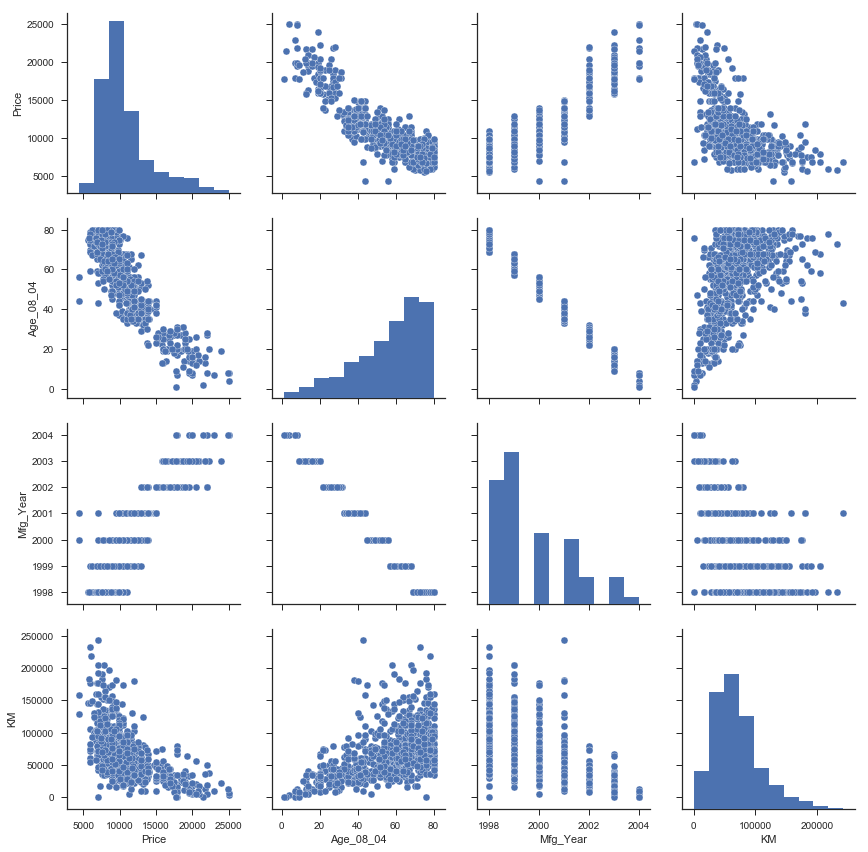

In [15]:
#sns_plot = sns.pairplot(pd.concat([dfy.Price, dfX[cols_real[:3]]], axis=1),size=3)
#plt.show()
sns_plot = sns.pairplot(pd.concat([ y_train, X_train[cols_real[:3]]], axis=1),size=3)
plt.show()

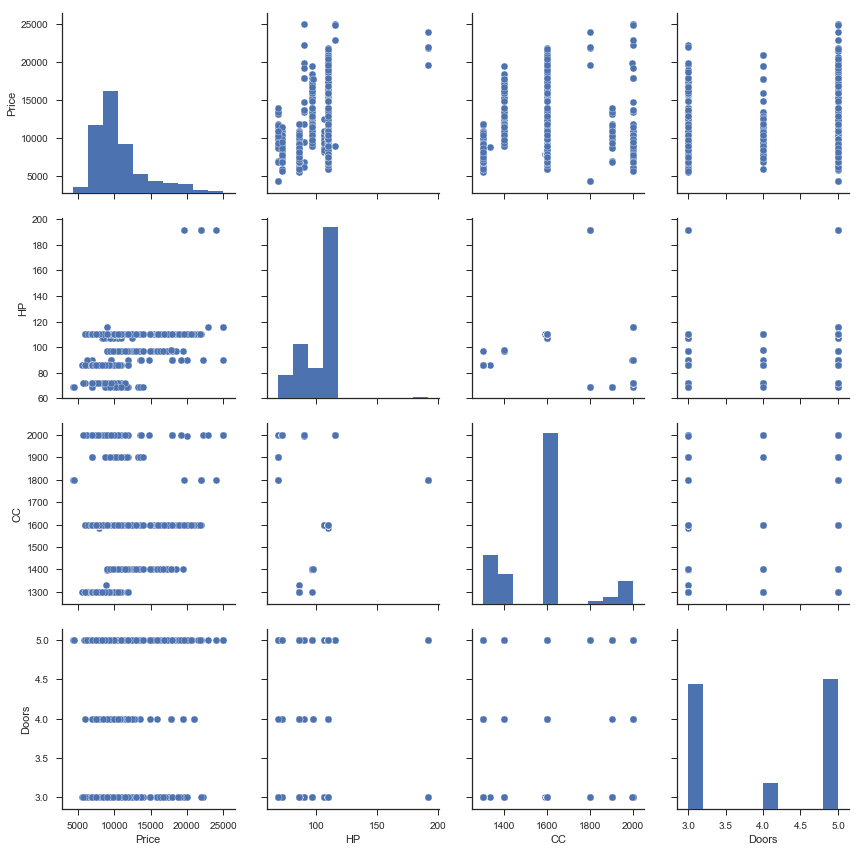

In [16]:
sns_plot = sns.pairplot(pd.concat([ y_train, X_train[cols_real[3:6]]], axis=1),size=3)
plt.show()

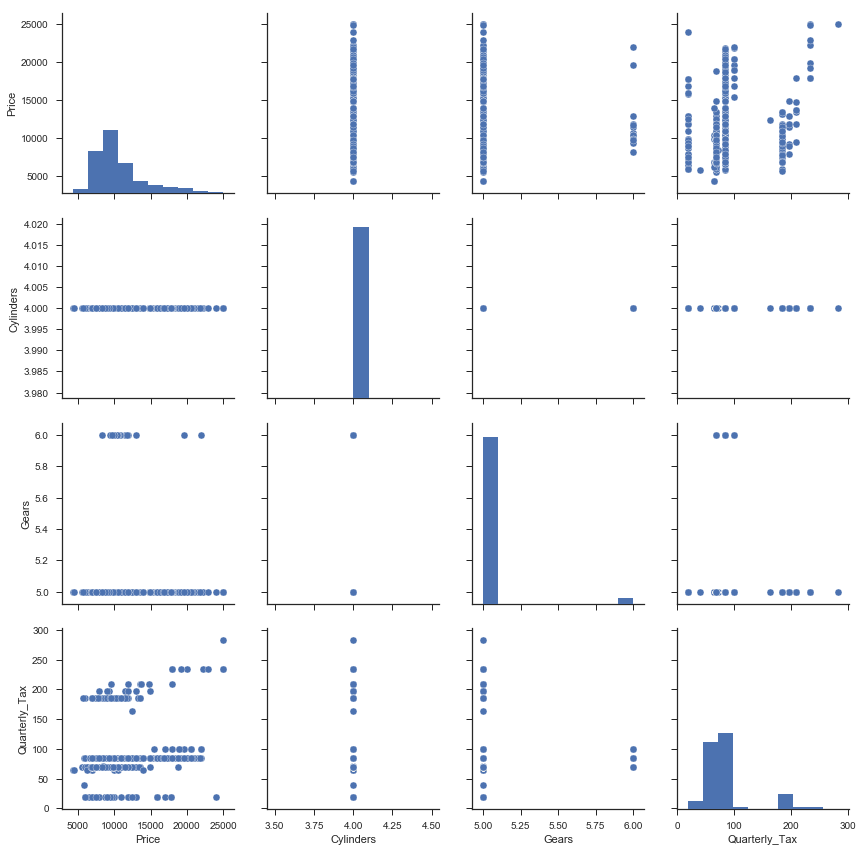

In [17]:

sns_plot = sns.pairplot(pd.concat([ y_train, X_train[cols_real[6:9]]], axis=1),size=3)
plt.show()

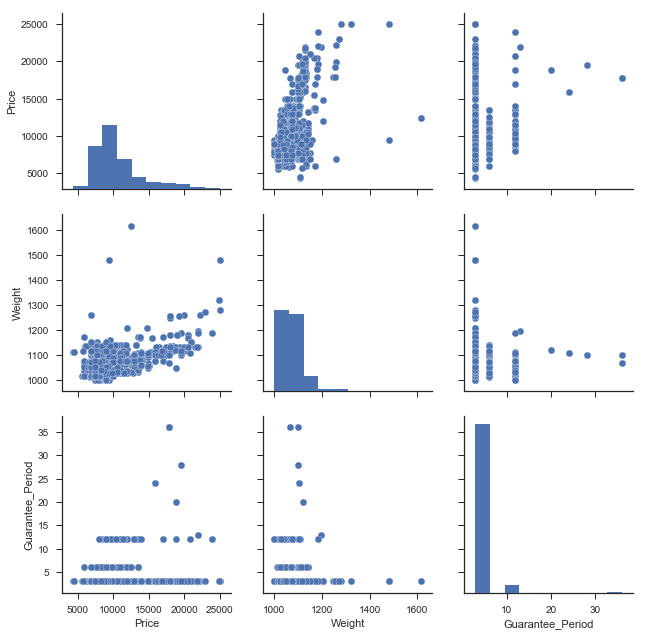

In [18]:
sns_plot = sns.pairplot(pd.concat([ y_train, X_train[cols_real[9:12]]], axis=1),size=3)
plt.show()

## 2) 양적변수간의 분포

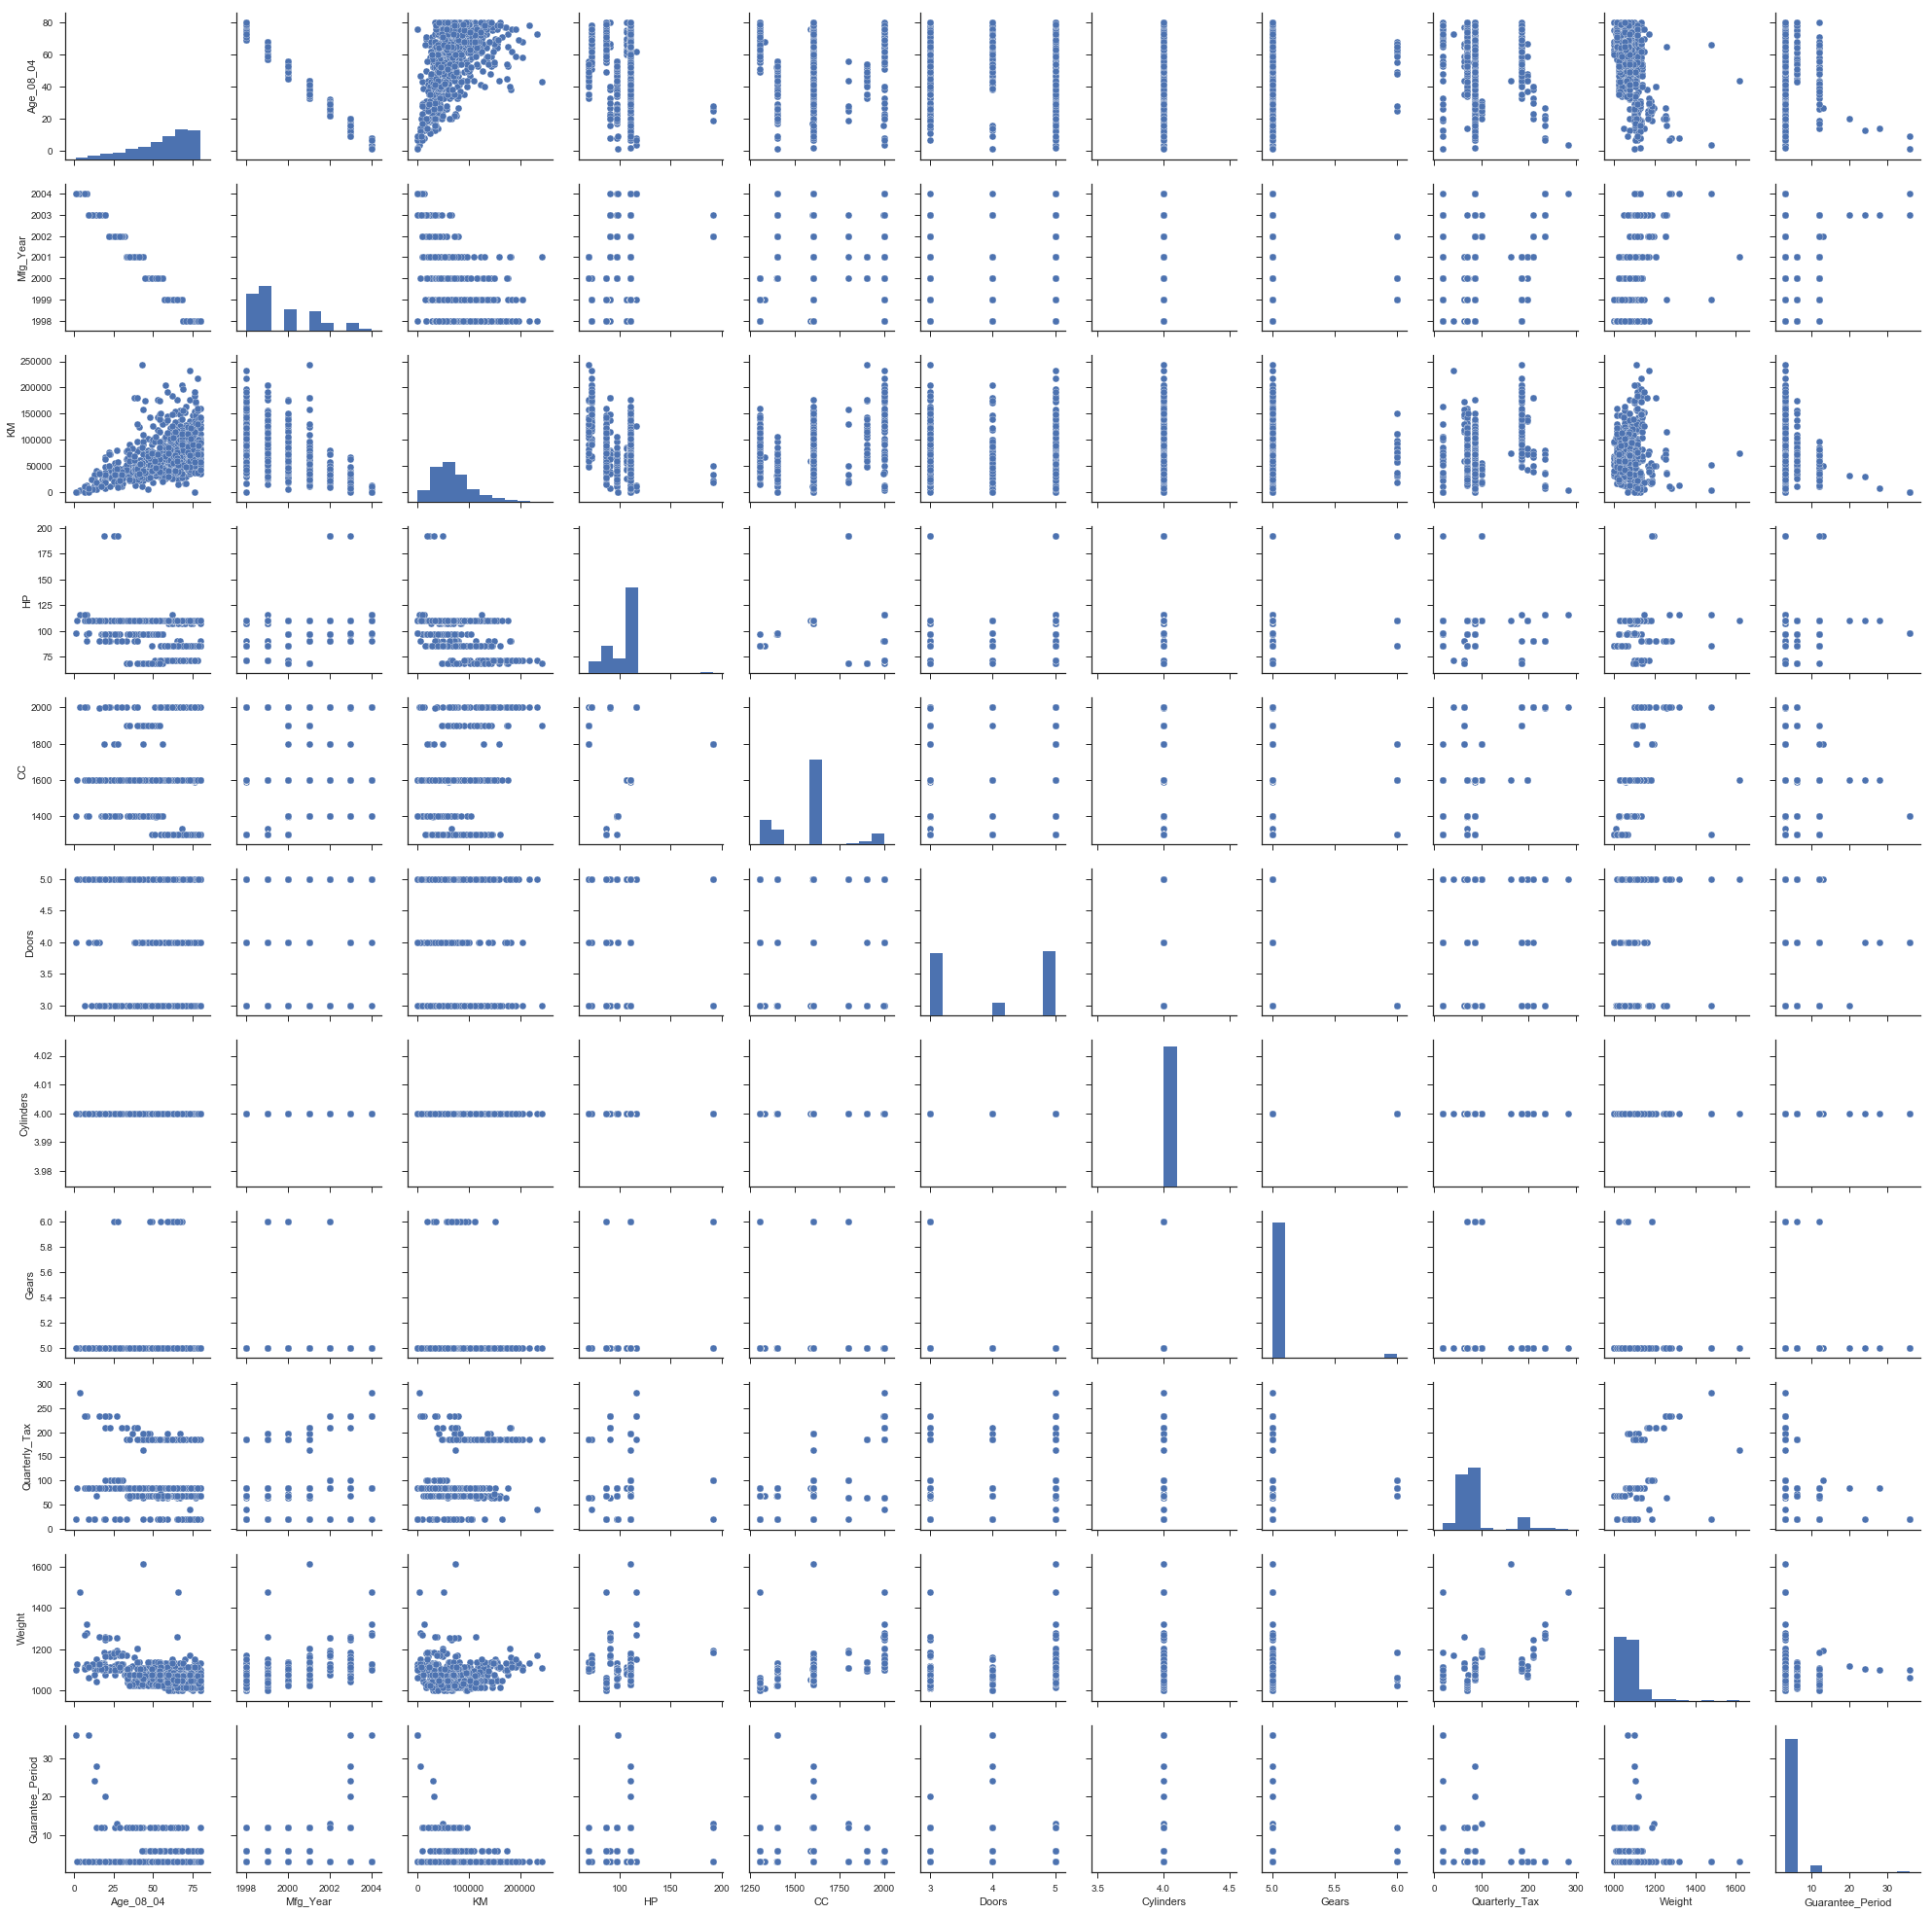

In [19]:
sns_plot = sns.pairplot(pd.concat([X_train[cols_real[:6]], X_train[cols_real[6:12]]], axis=1))
plt.show()
#sns.reset_orig()

## 3)질적변수 Boxplot

In [20]:
cols_cat = ['CC', 'Doors', 'Cylinders', 'Gears', 'Mfg_Month', 'Fuel_Type', 'Met_Color', 
            'Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 
            'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 
            'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 
            'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']

#'CC', 'Doors', 'Cylinders', 'gears'를 포함하여 총 29개
len (cols_cat)

29

In [21]:
def display_multi_boxplots(start_feature_name, row, col ):
    with plt.style.context(('seaborn-white')): # 단순 스타일 적용
        f, axes = plt.subplots(row, col, figsize=(2.3*col, 3.5*row), sharey=True)
        
        nums = row * col
        start_idx = cols_cat.index(start_feature_name) #받아온 값의 인덱스를 구한다
        
        for num, ax in zip(range(nums), axes.flat):
            try:
                sns.boxplot(x=X_train[cols_cat[start_idx+num]], y=y_train['Price'], palette='Set3', ax=ax)
                
            except: 
                pass

### 3-1) Boxplots 1

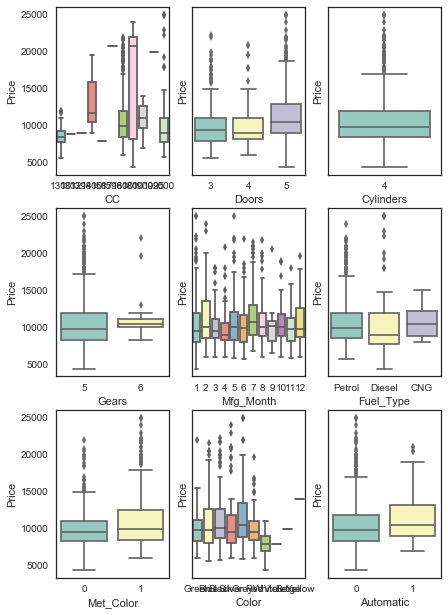

In [22]:
display_multi_boxplots('CC',3,3)
plt.show()

### 3-2) Boxplots 2 

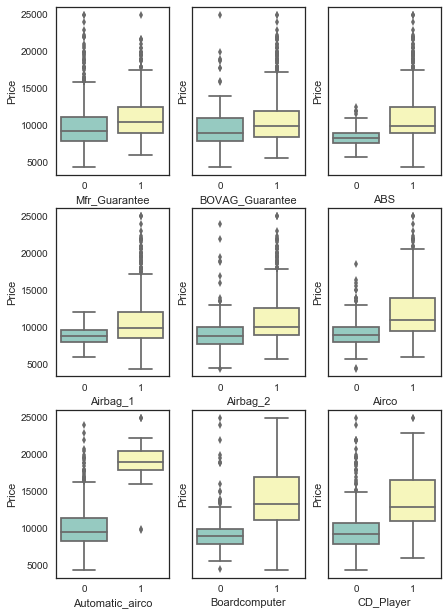

In [23]:


display_multi_boxplots('Mfr_Guarantee',3,3)
plt.show()


### 3-3) Boxplots 3

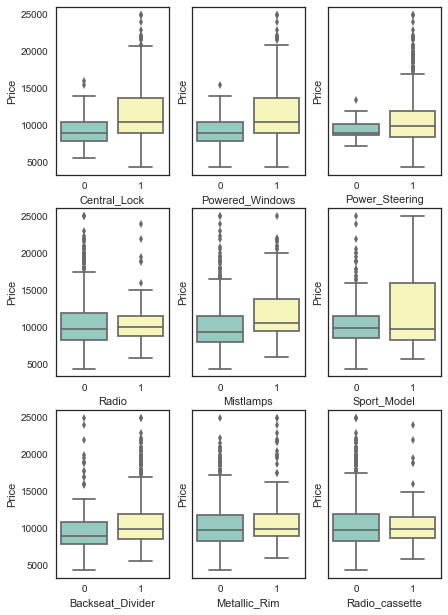

In [24]:
display_multi_boxplots('Central_Lock',3,3)
plt.show()


### 3-4) Boxplots 4

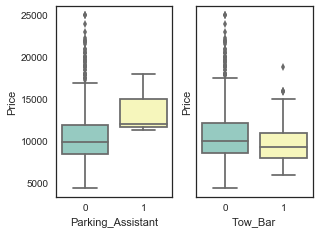

In [25]:

display_multi_boxplots('Parking_Assistant',1,2)
plt.show()

## 4) 상관 계수

In [27]:

# 7개 변수
cols_real = ['Age_08_04', 'Mfg_Year', 'KM', 'HP', 'Quarterly_Tax', 'Weight', 'Guarantee_Period']
# 28개 변수
cols_cat = ['CC', 'Doors', 'Gears', 'Mfg_Month', 'Fuel_Type', 'Met_Color', 
            'Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 
            'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 
            'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 
            'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']
#Cylinder삭제
print (len(cols_real), len(cols_cat))

7 28


In [28]:
train_set = pd.concat([y_train, X_train[cols_real] ], axis = 1)

corrmat = train_set.corr()
corrmat

,Price,Age_08_04,Mfg_Year,KM,HP,Quarterly_Tax,Weight,Guarantee_Period
Price,1.000000,-0.885460,0.894784,-0.561925,0.300042,0.168405,0.512317,0.169925
Age_08_04,-0.885460,1.000000,-0.983341,0.497051,-0.147630,-0.173915,-0.435504,-0.181447
Mfg_Year,0.894784,-0.983341,1.000000,-0.498251,0.152686,0.171600,0.442267,0.177536
KM,-0.561925,0.497051,-0.498251,1.000000,-0.364218,0.315523,0.022244,-0.144879
HP,0.300042,-0.147630,0.152686,-0.364218,1.000000,-0.357973,0.049417,0.089508
Quarterly_Tax,0.168405,-0.173915,0.171600,0.315523,-0.357973,1.000000,0.584696,-0.151231
Weight,0.512317,-0.435504,0.442267,0.022244,0.049417,0.584696,1.000000,-0.007216
Guarantee_Period,0.169925,-0.181447,0.177536,-0.144879,0.089508,-0.151231,-0.007216,1.000000


In [29]:
f, ax = plt.subplots(figsize=(8,8))
sns.set(font_scale=1.5)
hm = sns.heatmap(corrmat, cbar=True, annot=True, fmt='.2f',
                annot_kws={'size':10}
               )
#annot=상관계수 표시 / fmt=소수점둘째자리 / 
#plt.show()

In [30]:
train_set.describe()

,Price,Age_08_04,Mfg_Year,KM,HP,Quarterly_Tax,Weight,Guarantee_Period
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,10686.265707,56.100785,1999.628272,68426.229058,101.267016,87.640052,1072.278796,3.755236
std,3500.944478,18.452420,1.529281,38316.242124,14.514038,40.002785,52.760117,2.884230
min,4350.000000,1.000000,1998.000000,1.000000,69.000000,19.000000,1000.000000,3.000000
25%,8450.000000,44.000000,1998.000000,40629.500000,86.000000,69.000000,1040.000000,3.000000
50%,9800.000000,61.000000,1999.000000,63000.000000,110.000000,85.000000,1070.000000,3.000000
75%,11896.250000,69.250000,2001.000000,86095.250000,110.000000,85.000000,1085.000000,3.000000
max,24990.000000,80.000000,2004.000000,243000.000000,192.000000,283.000000,1615.000000,36.000000


## 5) Price 기술통계량 살펴보기

In [31]:
y_train.describe()

,Price
count,764.000000
mean,10686.265707
std,3500.944478
min,4350.000000
25%,8450.000000
50%,9800.000000
75%,11896.250000
max,24990.000000


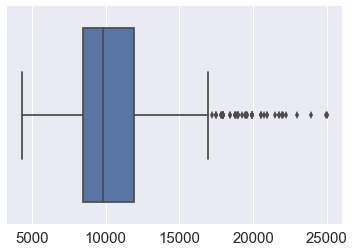

In [33]:

sns.boxplot(y_train)
plt.show()
#이상치가 상당히 많은것으로 파악된다

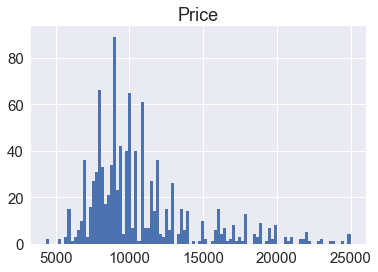

In [34]:
y.hist(bins=100)
plt.show()
#9,000EUR정도에 많은 분포가 있는 것 같다

# 2. 종속변수와 양적변수의 상관관계

* H0: 두개의 양적인 자료 간에는 직선의 관계가 없다
* H1: 두개의 양적인 자료간에는 직선의 관계가 있다

In [35]:
##Price의 정규성 검정
shap1= stats.shapiro(y_train["Price"])
print (shap1)

#정규성 가정이 깨지므로 kendal 사용

(0.8637189269065857, 3.2806969832627764e-25)


In [36]:
# 1)  Age_08_04
stats.kendalltau(y_train["Price"], X_train["Age_08_04"])
#직선의 관계가 있다

KendalltauResult(correlation=-0.67257004765982065, pvalue=1.3199191582119575e-163)

In [37]:
# 2) KM
stats.kendalltau(y_train["Price"], X_train["KM"])
#직선의 관계가 있다

KendalltauResult(correlation=-0.43345824998366489, pvalue=1.7320630262364461e-70)

In [38]:
# 3) Quarterly_Tax
stats.kendalltau(y_train["Price"], X_train["Quarterly_Tax"])
#직선의 관계가 있다


KendalltauResult(correlation=0.24871959091061871, pvalue=6.5066147427156191e-19)

In [39]:
# 4) Guarantee_Period
stats.kendalltau(y_train["Price"], X_train["Guarantee_Period"])
#직선의 관계가 있다


KendalltauResult(correlation=0.059953242104934516, pvalue=0.04158879256769224)

In [40]:
# 5) HP
stats.kendalltau(y_train["Price"], X_train["HP"])
#직선의 관계가 있다

KendalltauResult(correlation=0.18243890431306772, pvalue=5.3846247593108751e-11)

In [41]:
# 6) Weight
stats.kendalltau(y_train["Price"], X_train["Weight"])
#직선의 관계가 있다

KendalltauResult(correlation=0.30588049634091102, pvalue=3.4790926663418693e-34)

In [42]:
# 7) Mfg_Year
stats.kendalltau(y_train["Price"], X_train["Mfg_Year"])
#직선의 관계가 있다

KendalltauResult(correlation=0.7328912938772979, pvalue=2.5443545636707969e-164)

=> 양적변수 7개와 종속변수 Price는 통계적으로 직선의 관계가 있다

# 3. 질적변수 파악을 위한 독립2표본 검정

* H0: 2개 집단간의 Price의 평균은 차이가 없다
* H1: 2개 집단간의 Price의 평균은 차이가 있다
<p>대립가설이 성립하면 질적변수에 따른 Price는 차이가 있고, 영향을 준다고 생각할 수 있음

### 값이 2개인 질적변수
Met_color, Automatic, Mfr_Guarantee, BOVAG_Guarantee, ABS, Airbag_1, Airbag_2, Automatic_airco, Boardcomputer, CD_Player, Central_Lock, Powered_Windows, Power_Steering, Radio, Mistlamps, Sport_Model, Backseat_Divider, Metallic_Rim, Radio_cassette, Parking_Assistant, Tow_Bar

In [43]:


ind2test = ['Airco','Met_Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar']

train_set = pd.concat([y_train, X_train[ind2test] ], axis = 1)
train_set.head()
#dft = X_test[ind2test] #20개(price빼고)
#dft.head()

,Price,Airco,Met_Color,Automatic,Mfr_Guarantee,BOVAG_Guarantee,ABS,Airbag_1,Airbag_2,Automatic_airco,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
160,13500,1,0,0,0,1,1,1,0,0,...,1,1,1,0,0,0,0,1,0,1
876,7750,1,0,0,0,1,0,1,0,0,...,1,1,0,0,0,1,0,0,0,1
935,7250,0,1,0,1,1,1,1,1,0,...,1,1,0,1,0,1,1,0,0,1
347,10950,1,1,0,0,1,1,1,1,0,...,1,1,0,1,0,1,1,0,0,1
924,7350,0,0,0,0,0,1,1,1,0,...,0,1,0,0,1,1,0,0,0,0


In [44]:
def myself_2test(value):
    print ("<<{}>>".format(value))
    normal_test1 = stats.shapiro(train_set.loc[train_set[value]==0].Price) # 정규성 검정
    normal_test2 = stats.shapiro(train_set.loc[train_set[value]==1].Price)


    print ("<정규성 검정>")
    print (normal_test1)
    print (normal_test2)
    # Met_Color : 정규성

    if normal_test1[1] > 0.05 and normal_test2[1] > 0.05: #정규성이 만족한다면 등분산 검정을 실시한다
        print ("정규성 검정은 만족한다")
        print ("<등분산 검정>")
        lev = stats.levene(train_set.loc[train_set[value]==0].Price, \
                           train_set.loc[train_set[value]==1].Price, center="mean")
        print (lev)
        
    else: #비모수적 순위합
        ttest = stats.ranksums(train_set.loc[train_set[value]==0].Price, train_set.loc[train_set[value]==1].Price)
        print (ttest)
        if ttest.pvalue < 0.025:
            print ("{}의 집단과 Price는 영향이 있다".format(value))
            print 
            print
            return
        else :
            print ("{}의 집단과 Price는 영향이 없다".format(value))
            print
            print
            return
            
        
        
        
    if lev.pvalue > 0.5: # 등분산 검정을 만족한다면  등분산이 가정된 독립표본 T검정 실시
        print ("<등분산ttest>")
        ttest = stats.ttest_ind(train_set.loc[train_set[value] == 0].Price, train_set.loc[train_set[value]==1].Price, equal_var=True)
        print (ttest)#등분산 ttest결과 출력
        print # 줄띄우기
    else:#이분산 
        print ("<이분산 ttest>")
        ttest = stats.ttest_ind(train_set.loc[train_set[value] == 0].Price, train_set.loc[train_set[value]==1].Price, equal_var=False)
        print (ttest) #이분산 ttest결과 출력
        print # 줄띄우기
        
       ############결론#################
    if ttest.pvalue < 0.05:
        print ("{}의 집단과 Price는 영향이 있다".format(value))
        print 
        print
    else :
        print ("{}의 집단과 Price는 영향이 없다".format(value))
        print
        print
        
        
#########################################################################################
ind2test = ['Airco','Met_Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', \
            'Airbag_1', 'Airbag_2', 'Automatic_airco', 'Boardcomputer', 'CD_Player',\
            'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', \
            'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
            'Parking_Assistant', 'Tow_Bar']
train_set = pd.concat([y_train, X_train[ind2test] ], axis = 1)

for i in ind2test:
    myself_2test(i)


<<Airco>>
<정규성 검정>
(0.9376960396766663, 1.2836373457225658e-11)
(0.9081225991249084, 2.1235729239519122e-14)
RanksumsResult(statistic=-13.348988978878969, pvalue=1.2006741117769964e-40)
Airco의 집단과 Price는 영향이 있다
<<Met_Color>>
<정규성 검정>
(0.8647249937057495, 4.836983000548398e-14)
(0.8673004508018494, 1.74868744147709e-20)
RanksumsResult(statistic=-2.7091567782943446, pvalue=0.0067454456737201926)
Met_Color의 집단과 Price는 영향이 있다
<<Automatic>>
<정규성 검정>
(0.8640635013580322, 1.778194835070613e-24)
(0.8489997982978821, 4.120493758819066e-05)
RanksumsResult(statistic=-2.155684522959525, pvalue=0.031108307509111623)
Automatic의 집단과 Price는 영향이 없다
<<Mfr_Guarantee>>
<정규성 검정>
(0.8366547226905823, 3.846590988969748e-21)
(0.8791970610618591, 5.460742213367906e-15)
RanksumsResult(statistic=-5.326754136624297, pvalue=9.9983354347523883e-08)
Mfr_Guarantee의 집단과 Price는 영향이 있다
<<BOVAG_Guarantee>>
<정규성 검정>
(0.8393939733505249, 2.3835449169951062e-08)
(0.8618651628494263, 6.5229227978997345e-24)
RanksumsResult(st

In [45]:
#Gear

ind2test = ['Gears']
train_set = pd.concat([y_train, X_train[ind2test] ], axis = 1)


normal_test1 = stats.shapiro(train_set.loc[train_set["Gears"]==5].Price) # 정규성 검정
normal_test2 = stats.shapiro(train_set.loc[train_set["Gears"]==6].Price)



print (normal_test1)
print (normal_test2)
#정규성 깨짐

(0.8655385375022888, 1.0687046767903476e-24)
(0.6020820736885071, 9.510224572295556e-07)


In [46]:
#gears의 ranksum
ttest = stats.ranksums(train_set.loc[train_set["Gears"]==5].Price, train_set.loc[train_set["Gears"]==6].Price)
print (ttest)
#통계적으로 영향을 미친다

RanksumsResult(statistic=-1.9566384927358369, pvalue=0.050389986037121304)


# 4. 분산분석

* H0 : 변수의 데이터에 따른 Price는 차이가 없다
* H1 : 변수의 데이터에 따른 price는 차이가 있다.

### 값이 2개 이상인 질적변수
> Fuel_Type, Color, Doors
* 애매한 것 : Guarantee_Period, HP, CC(구간별 나눔 필요)

1) Fuel_Type

In [47]:
print (X_train.Fuel_Type.unique())

['Petrol' 'Diesel' 'CNG']


In [48]:
#1. 정규성 검정

train_set = pd.concat([y_train, X_train.Fuel_Type ], axis = 1)

anova_1 = stats.shapiro(train_set.loc[train_set["Fuel_Type"] == "Diesel"].Price)
anova_2 = stats.shapiro(train_set.loc[train_set["Fuel_Type"] == "Petrol"].Price)
anova_3 = stats.shapiro(train_set.loc[train_set["Fuel_Type"] == "CNG"].Price)

print (anova_1)
print (anova_2)
print (anova_3)


#결론 : 정규성 깨짐


(0.8181537985801697, 1.0187616972245905e-08)
(0.8672720193862915, 1.9525042622583708e-23)
(0.924360990524292, 0.46623754501342773)


In [49]:
#2. kRUSKAL
stats.kruskal(train_set.loc[train_set["Fuel_Type"] == "Diesel"].Price,\
              train_set.loc[train_set["Fuel_Type"] == "Petrol"].Price,\
              train_set.loc[train_set["Fuel_Type"] == "CNG"].Price)
#통계적 영향 있음            

KruskalResult(statistic=2.739135019676803, pvalue=0.25421688208129328)

2) Color

In [50]:
print (X_train.Color.unique())

['Green' 'Blue' 'Black' 'Silver' 'Grey' 'Red' 'White' 'Violet' 'Beige'
 'Yellow']


In [51]:
train_set = pd.concat([y_train, X_train.Color], axis = 1)

#1. 정규성 검정
anova_1 = stats.shapiro(train_set.loc[train_set["Color"] == "Blue"].Price)
anova_2 = stats.shapiro(train_set.loc[train_set["Color"] == "Silver"].Price)
anova_3 = stats.shapiro(train_set.loc[train_set["Color"] == "Black"].Price)
anova_4 = stats.shapiro(train_set.loc[train_set["Color"] == "Red"].Price)
anova_5 = stats.shapiro(train_set.loc[train_set["Color"] == "Grey"].Price)
anova_6 = stats.shapiro(train_set.loc[train_set["Color"] == "Green"].Price)
anova_7 = stats.shapiro(train_set.loc[train_set["Color"] == "White"].Price)
#anova_8 = stats.shapiro(df.loc[df["Color"] == "Yellow"].Price)
#anova_9 = stats.shapiro(df.loc[df["Color"] == "Violet"].Price)
anova_10 = stats.shapiro(df.loc[df["Color"] == "Beige"].Price)

print (anova_1)
print (anova_2)
print (anova_3)
print (anova_4)
print (anova_5)
print (anova_6)
print (anova_7)
#print anova_8
#print anova_9
print (anova_10)


#정규성 꺠짐

(0.8707841038703918, 2.7475624553296996e-10)
(0.8004103302955627, 4.823706234446945e-08)
(0.8746739029884338, 4.421122667963573e-08)
(0.9233145117759705, 2.4008707555367437e-07)
(0.8848561644554138, 2.0122756794194174e-09)
(0.9085530042648315, 9.57770339482522e-07)
(0.9548833966255188, 0.6387383341789246)
(0.7741674780845642, 0.05421324819326401)


In [52]:
#2. kRUSKAL
stats.kruskal(train_set.loc[train_set["Color"] == "Blue"].Price, \
              train_set.loc[train_set["Color"] == "Silver"].Price,\
              train_set.loc[train_set["Color"] == "Black"].Price,\
              train_set.loc[train_set["Color"] == "Red"].Price,\
              train_set.loc[train_set["Color"] == "Grey"].Price,\
              train_set.loc[train_set["Color"] == "Green"].Price,\
              train_set.loc[train_set["Color"] == "White"].Price,\
              train_set.loc[train_set["Color"] == "Beige"].Price)
              
#통계적으로 유의미함            
              

KruskalResult(statistic=24.458767866265127, pvalue=0.0009459286028579971)

3) Doors

In [53]:
print (X_train.Doors.unique())

[4 5 3]


In [54]:
train_set = pd.concat([y_train, X_train.Doors ], axis = 1)

#1. 정규성 검정
#anova_1 = stats.shapiro(df.loc[df["Doors"] == 2].Price)
anova_2 = stats.shapiro(train_set.loc[train_set["Doors"] == 3].Price)
anova_3 = stats.shapiro(train_set.loc[train_set["Doors"] == 4].Price)
anova_4 = stats.shapiro(train_set.loc[train_set["Doors"] == 5].Price)

#print anova_1
print (anova_2)
print (anova_3)
print (anova_4)


#결론 : 정규성 깨짐

(0.8646111488342285, 1.2622013817906673e-16)
(0.7827643156051636, 7.19600512510965e-09)
(0.8864052295684814, 1.5486143497181579e-15)


In [55]:
#2. kRUSKAL
stats.kruskal(train_set.loc[train_set["Doors"] == 3].Price,\
             train_set.loc[train_set["Doors"] == 4].Price,\
             train_set.loc[train_set["Doors"] == 5].Price)
#Statistic이 F값
#결론: 해당 변수의 데이터는 Price에 영향을 미침

KruskalResult(statistic=32.905791517369309, pvalue=7.1548109120138665e-08)

# 5. 양적 변수의 Categorization

분류하기 애매한 변수 : Guarantee_Period, HP, CC(구간별 나눔 필요)

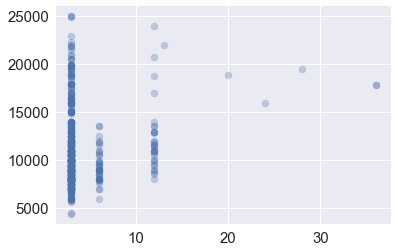

3     680
6      44
12     34
36      2
28      1
24      1
20      1
13      1
Name: Guarantee_Period, dtype: int64

In [56]:
#1) Guarantee_Period


plt.scatter(X_train.Guarantee_Period, y_train["Price"], alpha=0.3)
plt.show()

X_train.Guarantee_Period.value_counts()
#선형의 관계가 성립하지 않는다


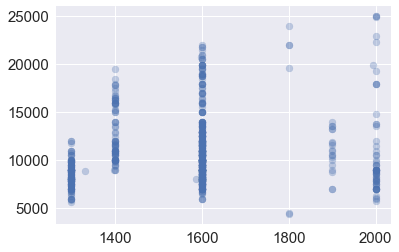

[1300 1332 1398 1400 1587 1598 1600 1800 1900 1995 2000]


1600    462
1300    131
1400     80
2000     61
1900     19
1800      6
1995      1
1598      1
1587      1
1398      1
1332      1
Name: CC, dtype: int64

In [58]:
#2) CC
plt.scatter(X_train.CC, y_train["Price"], alpha=0.3)
plt.show() #스케일된 KM과 Pricez
#구간을 3~4개로 나눠볼까

print (np.sort(X_train.CC.unique()))
X_train.CC.value_counts()

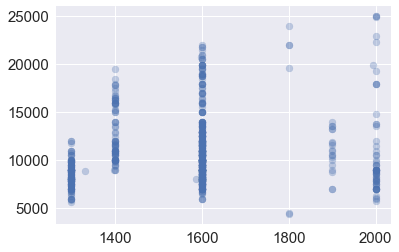

In [59]:
train_set = (X_train
            .assign (CC_new = X_train.CC))

train_set.head()
train_set.CC_new[0]
train_set.shape

CC = train_set.CC_new

plt.scatter(train_set.CC_new, y_train, alpha=0.3)
plt.show() #스케일된 KM과 Pricez

In [60]:
i = 0

while i < len(CC):
    if CC.iloc[i] < 1500 :
        CC.iloc[i] = 1 # 소형차
    elif CC.iloc[i] >= 1500 & CC.iloc[i] < 2000:
        CC.iloc[i] = 2 #중형차
    else:
        CC.iloc[i] = 3 #대형차
    i += 1
    


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


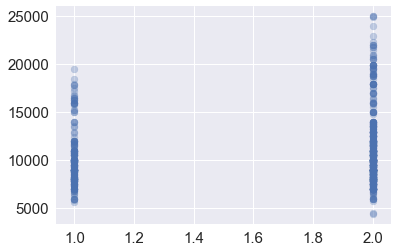

In [61]:
train_set.head()


plt.scatter(train_set.CC_new, y_train, alpha=0.3)
plt.show() #스케일된 KM과 Pricez
#카테고리화 했을 때 통계적으로 유의미한 관계가 있을것으로 보이지 않는다


In [65]:
train_set.CC_new.value_counts()

2    551
1    213
Name: CC_new, dtype: int64

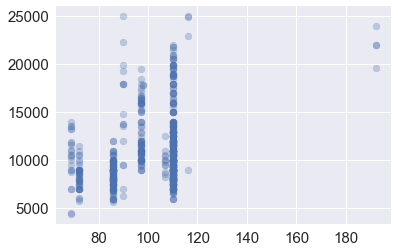

110    452
86     131
97      80
72      41
69      22
90      16
107     12
192      4
116      4
98       2
Name: HP, dtype: int64

In [66]:
#3)HP
plt.scatter(X_train.HP,y_train["Price"], alpha=0.3)
plt.show()
np.sort(X_train.HP.unique())
X_train.HP.value_counts()

In [67]:
#결론 : 카테고리화를 해야 할지, 양적 변수로 써야 할지 판단이 잘 서지 않는다

# 6. Dummy variable 

### 6-1) Options변수
Boolean값을 가지는 변수는 '유,무'로 판단하여 보유 개수를 표시하는 새로운 변수 Options로 변환한다

In [68]:
OptionList = [ 'Met_Color', 'Mfr_Guarantee', 'Airco','ABS', 'Airbag_1', 
            'Airbag_2', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 
            'Powered_Windows', 'Mistlamps', 'Backseat_Divider', 
            'Metallic_Rim', 'Tow_Bar', 'Gears'] #18개

test_set = X_train[OptionList]
option_temp = (test_set
            .assign(Options = lambda x:x.sum(axis=1) ))

option_temp.head()


,Met_Color,Mfr_Guarantee,Airco,ABS,Airbag_1,Airbag_2,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Mistlamps,Backseat_Divider,Metallic_Rim,Tow_Bar,Gears,Options
160,0,0,1,1,1,0,0,0,0,1,1,0,0,0,1,5,11
876,0,0,1,0,1,0,0,0,0,1,1,0,1,0,1,5,11
935,1,1,0,1,1,1,0,0,0,1,1,1,1,1,1,5,16
347,1,0,1,1,1,1,0,0,0,1,1,1,1,1,1,5,16
924,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,5,9


In [69]:
cols_real = ['Mfg_Year','KM','Weight', 'HP'] # HP는 애매하지만 일단 양적으로
X_processed = pd.concat([X_train[cols_real], option_temp.Options], axis = 1)

X_processed.head() #1차 최종 양적변수 DataFrame

,Mfg_Year,KM,Weight,HP,Options
160,2001,50856,1030,110,11
876,1998,134539,1070,110,11
935,1998,66880,1055,110,16
347,1999,67146,1075,110,16
924,1999,54000,1035,86,9


### 6-2) 3개이상 값을 가지는 질적 변수의 dummy변환

Fuel_Type
<p> Color
<p> Doors

1) Doors

In [70]:
Doors_d = pd.get_dummies(X_train.Doors)
Doors_d.head()


,3,4,5
160,0,1,0
876,0,0,1
935,1,0,0
347,0,0,1
924,0,0,1


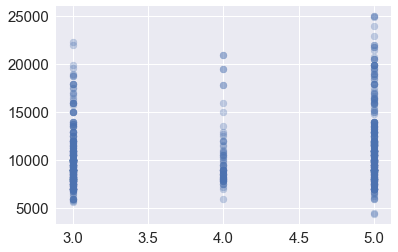

In [71]:
plt.scatter(X_train.Doors, y_train.Price, alpha = 0.3)
plt.show()
#눈으로 보기에는 선형의 관계가 성립하는 것 처럼 보이지 않는다

In [72]:
#단독 독렵변수 OLS
test_set = pd.concat([y_train.Price, Doors_d], axis = 1)
test_set.head()
model = smf.ols("Price~Doors_d", data = test_set).fit()
#model.summary()

# doors 단독으로는 adj-Rsquared값이 매우 미미하고 
#독립변수의 P-value를 봤을 시 통계적으로 유의한 영향을 미치지 않는 것으로 보인다

In [73]:
#다른 양적변수와 함께 OLS
X_processed_test = pd.concat([test_set, X_processed], axis =1)
X_processed_test.head()

model = smf.ols("Price~Mfg_Year + KM + Weight + HP+ Doors_d", data = X_processed_test).fit()
#model.summary()

2) Color

In [74]:
Color_d = pd.get_dummies(X_train.Color)
Color_d.head()

#단독 독렵변수 OLS
test_set = pd.concat([y_train.Price, Color_d], axis = 1)
test_set.head()
model = smf.ols("Price~Color_d", data = test_set).fit()
#model.summary()

In [75]:
#다른 양적변수와 함께 OLS
X_processed_test = pd.concat([test_set, X_processed], axis =1)
X_processed_test.head()

model = smf.ols("Price~Mfg_Year + Weight+Options+KM +HP+Color_d", data = X_processed_test).fit()
#model.summary()

3) Fuel_Type

In [76]:
FuelType_d = pd.get_dummies(X_train.Fuel_Type)
FuelType_d.head()


,CNG,Diesel,Petrol
160,0,0,1
876,0,0,1
935,0,0,1
347,0,0,1
924,0,0,1


In [77]:
#단독 독렵변수 OLS
test_set = pd.concat([y_train.Price, FuelType_d], axis = 1)
test_set.head()
model = smf.ols("Price~FuelType_d", data = test_set).fit()
#model.summary()


* 결론: 세가지 질적변수는 제외하기로 한다

# 7. Feature Selection을 위한 양적변수의 OLS Report수치 분석

<p>Mfg_Year
<p>KM
<p>Weight
<p>HP
<p>Options

In [78]:
X_processed.head()
OLS_test = pd.concat([y_train["Price"], X_processed], axis =1)
OLS_test.head()


,Price,Mfg_Year,KM,Weight,HP,Options
160,13500,2001,50856,1030,110,11
876,7750,1998,134539,1070,110,11
935,7250,1998,66880,1055,110,16
347,10950,1999,67146,1075,110,16
924,7350,1999,54000,1035,86,9


### 7-1) 다중공선성

In [79]:
vif_dic= {}

# 1) Mfg_Year
model = smf.ols(formula = " Mfg_Year~Weight+Options+HP+KM", data = OLS_test).fit()
rsquared = model.rsquared
rsquared
vif = 1/(1-rsquared)
vif_dic["Mfg_Year"] = vif

# 2) Weight
model = smf.ols(formula = " Weight~Mfg_Year+Options+HP+KM", data = OLS_test).fit()
rsquared = model.rsquared
rsquared
vif = 1/(1-rsquared)
vif_dic["Weight"] = vif

# 3) Options
model = smf.ols(formula = " Options~Weight+Mfg_Year+HP+KM", data = OLS_test).fit()
rsquared = model.rsquared
rsquared
vif = 1/(1-rsquared)
vif_dic["Options"] = vif

# 4) HP
model = smf.ols(formula = " HP~Weight+Options+Mfg_Year+KM", data = OLS_test).fit()
rsquared = model.rsquared
rsquared
vif = 1/(1-rsquared)
vif_dic["HP"] = vif

# 5) KM
model = smf.ols(formula = " KM~Weight+Options+HP+Mfg_Year", data = OLS_test).fit()
rsquared = model.rsquared
rsquared
vif = 1/(1-rsquared)
vif_dic["KM"] = vif


vif_dic

{'HP': 1.2669100198389449,
 'KM': 1.6884332240580564,
 'Mfg_Year': 2.2042297893469613,
 'Options': 1.4728395523958324,
 'Weight': 1.3921912973273449}

### 7-2) OLS

In [80]:
model = smf.ols("Price~Mfg_Year + KM + Weight + HP + Options", data = OLS_test).fit()
#model.summary()


In [81]:
model = smf.ols("Price~Mfg_Year + KM + Weight  ", data = OLS_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1450.
Date:                Sun, 13 Aug 2017   Prob (F-statistic):          6.92e-314
Time:                        17:38:16   Log-Likelihood:                -6590.5
No. Observations:                 764   AIC:                         1.319e+04
Df Residuals:                     760   BIC:                         1.321e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.161e+06   8.61e+04    -36.708      0.000   -3.33e+06   -2.99e+06
Mfg_Year    1579.3453     43.339     36.442      0.000    1494.268    1664.423
KM            -0.0204      0.002    -13.125      0.000      -0.023      -0.017
Weight        14.0780      1.089     12.922      0.000      11.939      16.217
==============================================================================
Omnibus:                       97.812   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              554.334
Skew:                          -0.406   Prob(JB):                    4.25e-121
Kurtosis:                       7.093   Cond. No.                     1.38e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
model = smf.ols("Price~Mfg_Year + KM + Weight  ", data = OLS_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1450.
Date:                Sun, 13 Aug 2017   Prob (F-statistic):          6.92e-314
Time:                        17:38:18   Log-Likelihood:                -6590.5
No. Observations:                 764   AIC:                         1.319e+04
Df Residuals:                     760   BIC:                         1.321e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.161e+06   8.61e+04    -36.708      0.000   -3.33e+06   -2.99e+06
Mfg_Year    1579.3453     43.339     36.442      0.000    1494.268    1664.423
KM            -0.0204      0.002    -13.125      0.000      -0.023      -0.017
Weight        14.0780      1.089     12.922      0.000      11.939      16.217
==============================================================================
Omnibus:                       97.812   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              554.334
Skew:                          -0.406   Prob(JB):                    4.25e-121
Kurtosis:                       7.093   Cond. No.                     1.38e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
model = smf.ols("Price~Mfg_Year + KM   ", data = OLS_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     1717.
Date:                Sun, 13 Aug 2017   Prob (F-statistic):          8.73e-283
Time:                        17:38:27   Log-Likelihood:                -6666.4
No. Observations:                 764   AIC:                         1.334e+04
Df Residuals:                     761   BIC:                         1.335e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.732e+06   8.16e+04    -45.750      0.000   -3.89e+06   -3.57e+06
Mfg_Year    1872.2481     40.769     45.924      0.000    1792.216    1952.281
KM            -0.0141      0.002     -8.672      0.000      -0.017      -0.011
==============================================================================
Omnibus:                       62.977   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.349
Skew:                           0.309   Prob(JB):                     7.06e-50
Kurtosis:                       5.594   Cond. No.                     1.18e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
model = smf.ols("Price~Mfg_Year +Weight   ", data = OLS_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1705.
Date:                Sun, 13 Aug 2017   Prob (F-statistic):          7.57e-282
Time:                        17:38:29   Log-Likelihood:                -6668.6
No. Observations:                 764   AIC:                         1.334e+04
Df Residuals:                     761   BIC:                         1.336e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.802e+06   7.85e+04    -48.438      0.000   -3.96e+06   -3.65e+06
Mfg_Year    1901.6663     39.524     48.114      0.000    1824.077    1979.255
Weight         9.6171      1.146      8.395      0.000       7.368      11.866
==============================================================================
Omnibus:                      108.407   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              517.261
Skew:                          -0.544   Prob(JB):                    4.77e-113
Kurtosis:                       6.881   Cond. No.                     3.29e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
model = smf.ols("Price~Mfg_Year + Options", data = OLS_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1672.
Date:                Sun, 13 Aug 2017   Prob (F-statistic):          3.07e-279
Time:                        17:38:32   Log-Likelihood:                -6674.6
No. Observations:                 764   AIC:                         1.336e+04
Df Residuals:                     761   BIC:                         1.337e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.768e+06   8.28e+04    -45.499      0.000   -3.93e+06   -3.61e+06
Mfg_Year    1888.7001     41.479     45.534      0.000    1807.273    1970.127
Options      155.9920     20.580      7.580      0.000     115.592     196.392
==============================================================================
Omnibus:                       70.860   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              391.238
Skew:                           0.152   Prob(JB):                     1.11e-85
Kurtosis:                       6.493   Cond. No.                     3.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
model = smf.ols("Price~Mfg_Year + Options", data = OLS_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1672.
Date:                Sun, 13 Aug 2017   Prob (F-statistic):          3.07e-279
Time:                        17:38:36   Log-Likelihood:                -6674.6
No. Observations:                 764   AIC:                         1.336e+04
Df Residuals:                     761   BIC:                         1.337e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.768e+06   8.28e+04    -45.499      0.000   -3.93e+06   -3.61e+06
Mfg_Year    1888.7001     41.479     45.534      0.000    1807.273    1970.127
Options      155.9920     20.580      7.580      0.000     115.592     196.392
==============================================================================
Omnibus:                       70.860   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              391.238
Skew:                           0.152   Prob(JB):                     1.11e-85
Kurtosis:                       6.493   Cond. No.                     3.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
model = smf.ols("Price~Mfg_Year+Weight+ Options", data = OLS_test).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     1233.
Date:                Sun, 13 Aug 2017   Prob (F-statistic):          1.79e-291
Time:                        17:38:39   Log-Likelihood:                -6642.4
No. Observations:                 764   AIC:                         1.329e+04
Df Residuals:                     760   BIC:                         1.331e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.523e+06   8.49e+04    -41.480      0.000   -3.69e+06   -3.36e+06
Mfg_Year    1761.2703     42.739     41.209      0.000    1677.369    1845.172
Weight         9.0744      1.110      8.173      0.000       6.895      11.254
Options      145.2199     19.788      7.339      0.000     106.374     184.065
==============================================================================
Omnibus:                       88.205   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.957
Skew:                          -0.350   Prob(JB):                    7.32e-104
Kurtosis:                       6.799   Cond. No.                     3.68e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
model = smf.ols("Price~Mfg_Year + KM + Weight + Options", data = OLS_test).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1192.
Date:                Sun, 13 Aug 2017   Prob (F-statistic):               0.00
Time:                        17:38:41   Log-Likelihood:                -6560.0
No. Observations:                 764   AIC:                         1.313e+04
Df Residuals:                     759   BIC:                         1.315e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.895e+06   8.93e+04    -32.422      0.000   -3.07e+06   -2.72e+06
Mfg_Year    1445.8335     44.928     32.181      0.000    1357.636    1534.031
KM            -0.0202      0.001    -13.519      0.000      -0.023      -0.017
Weight        13.5075      1.050     12.865      0.000      11.446      15.569
Options      141.2806     17.778      7.947      0.000     106.380     176.181
==============================================================================
Omnibus:                       74.702   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              465.999
Skew:                          -0.096   Prob(JB):                    6.45e-102
Kurtosis:                       6.821   Cond. No.                     1.49e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
model = smf.ols("Price~Mfg_Year + Weight + Options", data = OLS_test).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     1233.
Date:                Sun, 13 Aug 2017   Prob (F-statistic):          1.79e-291
Time:                        17:38:44   Log-Likelihood:                -6642.4
No. Observations:                 764   AIC:                         1.329e+04
Df Residuals:                     760   BIC:                         1.331e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.523e+06   8.49e+04    -41.480      0.000   -3.69e+06   -3.36e+06
Mfg_Year    1761.2703     42.739     41.209      0.000    1677.369    1845.172
Weight         9.0744      1.110      8.173      0.000       6.895      11.254
Options      145.2199     19.788      7.339      0.000     106.374     184.065
==============================================================================
Omnibus:                       88.205   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              474.957
Skew:                          -0.350   Prob(JB):                    7.32e-104
Kurtosis:                       6.799   Cond. No.                     3.68e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 8. Cross Validation

### 8_1) validation data에 Options column추가

In [92]:
X_test.head()

,Age_08_04,Mfg_Year,KM,HP,CC,Doors,Cylinders,Gears,Quarterly_Tax,Weight,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
267,42,2001,55400,110,1600,5,4,5,85,1075,...,0,1,0,0,0,1,0,0,0,1
142,42,2001,42560,110,1600,5,4,5,85,1080,...,1,1,0,1,0,1,0,0,0,0
838,73,1998,87000,86,1300,3,4,5,69,1015,...,0,1,1,0,0,0,0,1,0,0
175,49,2000,36000,110,1600,5,4,5,85,1080,...,1,1,0,1,0,1,0,0,0,0
481,63,1999,47612,86,1300,3,4,5,69,1015,...,0,1,0,0,1,1,0,0,0,0


In [93]:
y_test.head()

,Price
267,11750
142,13950
838,7950
175,13000
481,9950


In [94]:
OptionList = [ 'Met_Color', 'Mfr_Guarantee', 'Airco','ABS', 'Airbag_1', 
            'Airbag_2', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 
            'Powered_Windows', 'Mistlamps', 'Backseat_Divider', 
            'Metallic_Rim', 'Tow_Bar', 'Gears'] #18개

selected_real = ['Mfg_Year', 'KM', 'Weight', 'HP'] #테스트  셋의 양적변수


X1 = X_test[OptionList] # 질적변수 추출
X2 = X_test[selected_real] # 양적변수 추출

X3 = (X1
      .assign(Options = lambda x:x.sum(axis = 1))) #options 변수 만듬

X4 = pd.concat([X2, X3.Options], axis =1)



In [95]:

#모형 변수를 넣는다

selected_col = ['Mfg_Year', 'KM','Weight']


X_train_model = OLS_test[selected_col] # train 의 독립변수
X_test_model = X4[selected_col]
y_train_model = y_train# train의 종속변수
y_test_model = y_test # test의 종속변수
y_train_model.head()



,Price
160,13500
876,7750
935,7250
347,10950
924,7350


In [96]:
print (X_train_model.shape, X_test_model.shape)

(764, 3) (255, 3)


### 8_2) RMSE와 R2평가

In [97]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics

model = linear_model.LinearRegression()
model.fit (X_train_model, y_train_model) # 학습시킴

y_train_pred = model.predict(X_train_model) #train의 예측값
y_test_pred = model.predict (X_test_model) # test의 예측값

rmse_train =np.sqrt(metrics.mean_squared_error (y_train_model, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test_model, y_test_pred))  # mse값 비교

##################################

r2_train = r2_score(y_train_model, y_train_pred)
r2_test = r2_score(y_test_model, y_test_pred) # r2값 비교

##############################

print ("Training Data => RMSE : {}, R2 : {}".format(rmse_train, r2_train))
print ("Test Data => RMSE:{} , R2:{}". format(rmse_test, r2_test))

Training Data => RMSE : 1349.3598622884206, R2 : 0.8512510361580443
Test Data => RMSE:1381.3792106855365 , R2:0.8698110236829263


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


* test의 MSE가 더 높으면 과적합
* R2는 더 높아야 함

# 9. 이상치 분석

* 이상치: 표준화된 잔차의 절대값이 3 이상
* 영향점 : cook's D >1 or DFFIT의 절대값 >2

1) KM

-0.187009869999


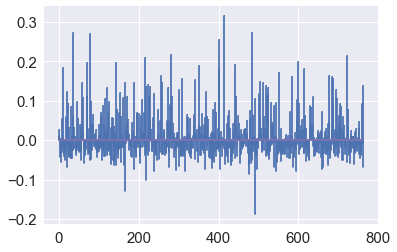

In [98]:
model = smf.ols("y_train_model.Price~KM", data = X_train_model).fit()
#model.summary()
influence = model.get_influence()
(c, p) = influence.dffits
#c: distance / p:p-value
plt.stem(np.arange(len(c)), c, markerfmt =',') 
print (c.min())
plt.show() # dffit

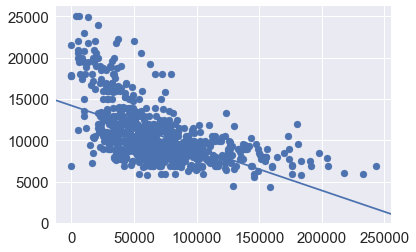

hat.sum() = 1.9999999999999996


In [99]:
plt.scatter(X_train_model.KM, y_train_model.Price)
sm.graphics.abline_plot(model_results = model, ax=plt.gca())
hat = influence.hat_matrix_diag
idx = hat > 0.05
plt.scatter(X_train_model.KM[idx], y_train_model.Price[idx], s=300, c='r', alpha =0.5)
#plt.axis([0, 20000, 0, 35000])
plt.show()
print ("hat.sum() = {}".format(hat.sum()))

#레버

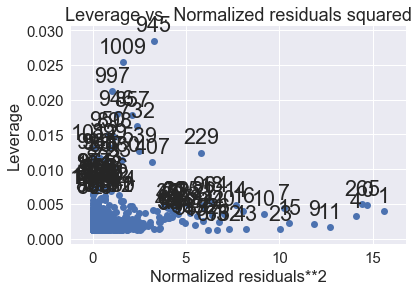

In [100]:
sm.graphics.plot_leverage_resid2(model)
plt.show()

> index 77, 134의 값에 평균의 값을 대입 해 보았으나 수치가 더 나빠짐

2) Weight

In [103]:
model = smf.ols("y_train_model.Price~Weight", data = X_train_model).fit()

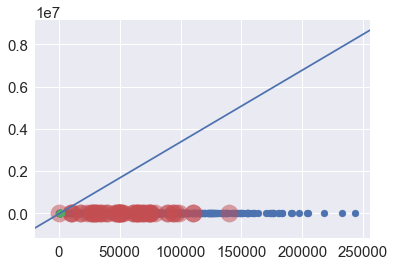

hat.sum() = 1.9999999999999996


In [104]:
#레버리지: 0.05 넘는 데이터 표시

plt.scatter(X_train_model.Weight, y_train_model.Price)
sm.graphics.abline_plot(model_results = model, ax=plt.gca())
hat = influence.hat_matrix_diag
idx = hat > 0.05
plt.scatter(X_train_model.Weight[idx], y_train_model.Price[idx], s=300, c='r', alpha =0.5)
#plt.axis([0, 20000, 0, 35000])
plt.show()
print ("hat.sum() = {}".format(hat.sum()))

#레버

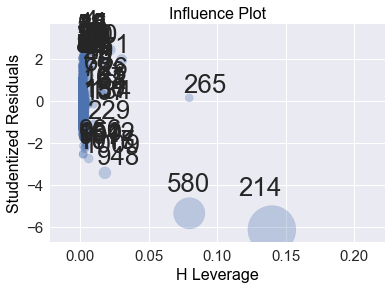

In [105]:
#Cook's Distance

sm.graphics.influence_plot(model, plot_alpha=0.3)
plt.show()

3) Mfg_Year

In [107]:
model = smf.ols("y_train_model.Price~Mfg_Year", data = X_train_model).fit()

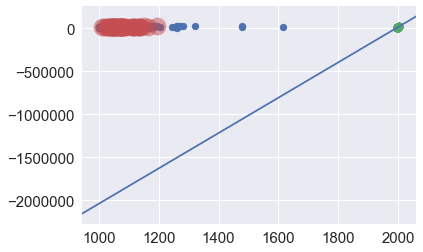

hat.sum() = 1.9999999999999996


In [109]:
#레버리지: 0.05 넘는 데이터 표시

plt.scatter(X_train_model.Mfg_Year, y_train_model.Price)
sm.graphics.abline_plot(model_results = model, ax=plt.gca())
hat = influence.hat_matrix_diag
idx = hat > 0.05
plt.scatter(X_train_model.Mfg_Year[idx], y_train_model.Price[idx], s=300, c='r', alpha =0.5)
#plt.axis([0, 20000, 0, 35000])
plt.show()
print ("hat.sum() = {}".format(hat.sum()))

#레버

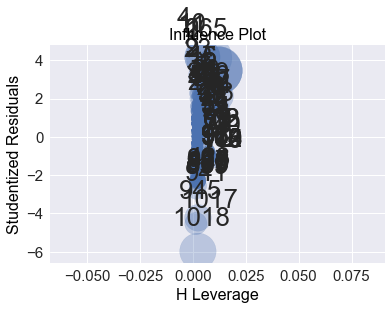

In [110]:
#Cook's Distance

sm.graphics.influence_plot(model, plot_alpha=0.3)
plt.show()

> 77번 index(Price의 최대값 데이터)가 높은 Leverage에 포함되어 해당 데이터 값을 낮춰보고자 한다

In [111]:
y_train_model.describe()
#75%의 값으로f - > 두번째 높은 값으로

sns.boxplot(y_train['Price'], palette='Set3', ax=ax)
plt.show()

In [112]:
#75%의 값으로
#y_train_model.Price[77] = 11750
#print y_train_model.Id[77]

# 10. 평가

In [113]:

#모형 변수를 넣는다

selected_col = ['Mfg_Year', 'KM','Weight', 'Options']


X_train_model = OLS_test[selected_col] # train 의 독립변수
X_test_model = X4[selected_col]
y_train_model = y_train# train의 종속변수
y_test_model = y_test # test의 종속변수
y_train_model.head()


,Price
160,13500
876,7750
935,7250
347,10950
924,7350


In [114]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics

model = linear_model.LinearRegression()
model.fit (X_train_model, y_train_model) # 학습시킴

y_train_pred = model.predict(X_train_model) #train의 예측값
y_test_pred = model.predict (X_test_model) # test의 예측값

rmse_train =np.sqrt(metrics.mean_squared_error (y_train_model, y_train_pred))
rmse_test = np.sqrt(metrics.mean_squared_error(y_test_model, y_test_pred))  # mse값 비교

##################################

r2_train = r2_score(y_train_model, y_train_pred)
r2_test = r2_score(y_test_model, y_test_pred) # r2값 비교

##############################

print ("Training Data => RMSE : {}, R2 : {}".format(rmse_train, r2_train))
print ("Test Data => RMSE:{} , R2:{}". format(rmse_test, r2_test))

Training Data => RMSE : 1296.501161361932, R2 : 0.8626767117304193
Test Data => RMSE:1372.693344039116 , R2:0.8714430866689239


In [115]:
model = smf.ols("y_train_model.Price~Mfg_Year + KM + Weight+Options ", data = X_train_model).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     y_train_model.Price   R-squared:                       0.863
Model:                             OLS   Adj. R-squared:                  0.862
Method:                  Least Squares   F-statistic:                     1192.
Date:                 Sun, 13 Aug 2017   Prob (F-statistic):               0.00
Time:                         17:41:52   Log-Likelihood:                -6560.0
No. Observations:                  764   AIC:                         1.313e+04
Df Residuals:                      759   BIC:                         1.315e+04
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.895e+06   8.93e+04    -32.422      0.000   -3.07e+06   -2.72e+06
Mfg_Year    1445.8335     44.928     32.181      0.000    1357.636    1534.031
KM            -0.0202      0.001    -13.519      0.000      -0.023      -0.017
Weight        13.5075      1.050     12.865      0.000      11.446      15.569
Options      141.2806     17.778      7.947      0.000     106.380     176.181
==============================================================================
Omnibus:                       74.702   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              465.999
Skew:                          -0.096   Prob(JB):                    6.45e-102
Kurtosis:                       6.821   Cond. No.                     1.49e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

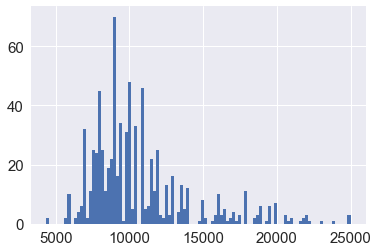

In [116]:
y_train_model.Price.hist(bins=100)
plt.show()

# 11. 최종 모델 선택

회귀식
* yhat =-2.895e+06+ (1445.8335 Mfg_Year) + (-0.0202 KM) + (13.5075	Weight) + (141.2806 Options)

In [54]:
OptionList = [ 'Met_Color', 'Mfr_Guarantee', 'Airco','ABS', 'Airbag_1', 
            'Airbag_2', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 
            'Powered_Windows', 'Mistlamps', 'Backseat_Divider', 
            'Metallic_Rim', 'Tow_Bar', 'Gears'] #18개

selected_real = ['Id', 'Mfg_Year', 'KM', 'Weight'] #테스트  셋의 양적변수


X1 = df[OptionList] # 질적변수 추출
X2 = df[selected_real] # 양적변수 추출

X3 = (X1
      .assign(Options = lambda x:x.sum(axis = 1))) #options 변수 만듬

X4 = pd.concat([X2, X3.Options], axis =1)

X4.head()

,Id,Mfg_Year,KM,Weight,Options
0,3,2002,41711,1165,12
1,4,2002,48000,1165,11
2,6,2002,61000,1170,14
3,7,2002,94612,1245,14
4,8,2002,75889,1245,16


In [55]:
selected_model = (X4
                .assign(Yhat = lambda x:-2.895e+06 + (1445.8335*x.Mfg_Year) + (-0.0202 *x.KM) + (13.5075 * x.Weight) + (141.2806*x.Options)))

In [59]:
selected_model


,Id,Mfg_Year,KM,Weight,Options,Yhat
0,3,2002,41711,1165,12,16147.7095
1,4,2002,48000,1165,11,15879.3911
2,6,2002,61000,1170,14,16108.1704
3,7,2002,94612,1245,14,16442.2705
4,8,2002,75889,1245,16,17103.0363
5,9,2002,19700,1185,11,16721.2011
6,10,2002,71138,1105,11,14601.5535
7,12,2002,43610,1185,18,17227.1833
8,15,2002,34131,1185,20,17701.2203
9,19,2002,25563,1065,15,15546.9909


In [60]:
from pandas import DataFrame

In [62]:
selected_model.to_csv('C:\Mine\selected_model.csv')